<a href="https://colab.research.google.com/github/JayYongjaeKim/MoLab/blob/main/Project_%ED%83%9D%EC%8B%9C_%EC%9D%B4%EC%9A%A9%EB%82%B4%EC%97%AD_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving trip.csv to trip.csv


# 1. 데이터 로드 및 데이터 확인
1차 파악
- 날짜 데이터 변환필요 (미국식 표기 > 한국식 표기)
- 거리와 요금의 상관관계 볼 수 있어보임
- 거리에 따른 요금 지불 방식의 상관관계도 보면 좋아보임
- 데이터 정제는 필요 없어보임

In [3]:
import pandas as pd

trip_df = pd.read_csv('trip.csv')

In [4]:
trip_df.head(5)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


# 2. 데이터 정보 확인

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
trip_df['payment_method'].value_counts()

,count
payment_method,
Cash,11196
Debit Card,5783
Credit Card,5722


# 3. 컬럼별 데이터 확인

In [ ]:
for column in trip_df.columns:
    print(f"{column} 컬럼의 고유값:\n{trip_df[column].value_counts()}")

passenger_name 컬럼의 고유값:
passenger_name
Michael Smith        16
John Smith           14
David Smith          12
James Smith          11
Michael Johnson      11
                     ..
Charlene Casey        1
Debra Martin          1
Michelle Thompson     1
Carolyn Zhang         1
Benjamin Miller       1
Name: count, Length: 20030, dtype: int64
tpep_pickup_datetime 컬럼의 고유값:
tpep_pickup_datetime
07/03/2017 3:45:19 PM     2
10/08/2017 12:14:18 AM    2
02/13/2017 4:25:41 PM     2
04/15/2017 6:05:19 PM     2
10/17/2017 10:54:24 AM    2
                         ..
12/22/2017 8:19:41 AM     1
05/10/2017 10:39:24 PM    1
04/27/2017 10:37:23 PM    1
11/23/2017 8:35:51 AM     1
03/02/2017 1:02:49 PM     1
Name: count, Length: 22687, dtype: int64
tpep_dropoff_datetime 컬럼의 고유값:
tpep_dropoff_datetime
10/18/2017 8:07:45 PM     2
04/17/2017 7:39:36 AM     2
08/15/2017 8:00:37 PM     2
03/03/2017 11:21:27 PM    2
10/15/2017 1:27:35 AM     2
                         ..
12/22/2017 8:32:48 AM     1
05/10/2

# 4. 데이터 클렌징

## 4-1. 결측치 처리

In [7]:
trip_df.isna().sum()
# fare_amount에서 결측값(null) 발생 확인

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [10]:
trip_df[trip_df['fare_amount'].isna()]
#해당 결측값은 어떠한 값으로 채우는것이 베스트일까
#해당 거리와 비슷한 값을 채우는 것이 베스트인 것으로 보임 why? 택시요금은 거리에 따라 비슷할 것
#거리별 비슷한 값은 어떻게 구해야 하는가? > for 문을 활용하여 해당 거리 +-1 인 값을 다 리스트에 넣어 그 값 기준 mean 을 구해보자. *iterrows()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [22]:
import numpy as np
trip_2_mean = []
trip_15_mean = []

for index, row in trip_df.iterrows():
  if 2 <= row['trip_distance'] <=3:
    trip_2_mean.append(row['fare_amount'])
  # elif 10 <= row['trip_distance'] <=16:
  #   trip_2_mean.append(row['fare_amount'])

mean_2 = np.nanmean(trip_2_mean)
# mean_15 = sum(trip_15_mean) / len(trip_15_mean)

print(mean_2)
# print(mean_15)
# 15의 결과는 나오지 않으며(비슷한 값이 없음) 요금은 "예측값"에 해당될테니 과감히 제거
# 2는 12로 채울 것

12.451941666666666


In [26]:
trip_df = trip_df[~trip_df['passenger_name'].isin(['Maria Ibarra', 'Tina Avila'])]
# 15 드랍

In [28]:
trip_df[trip_df['passenger_name']=='Benjamin Johnson']['fare_amount']

,fare_amount
52,NaN


In [29]:
trip_df.loc[trip_df['passenger_name'] == 'Benjamin Johnson', 'fare_amount'] = 12.4

In [30]:
trip_df[trip_df['passenger_name']=='Benjamin Johnson']['fare_amount']

,fare_amount
52,12.4


## 4-2. 데이터 타입 변환

In [31]:
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [32]:
trip_df['tpep_pickup_datetime']

,tpep_pickup_datetime
0,2017-03-25 08:55:43
1,2017-04-11 14:53:28
2,2017-12-15 07:26:56
3,2017-05-07 13:17:59
4,2017-04-15 23:32:20
...,...
22696,2017-02-24 17:37:23
22697,2017-08-06 16:43:59
22698,2017-09-04 14:54:14
22699,2017-07-15 12:56:30


## 4-3. 중복 데이터 제거

In [33]:
trip_df = trip_df.drop_duplicates()

In [34]:
trip_df.duplicated().sum()

0

## 4-4. 데이터 일관성 유지

In [35]:
trip_df['payment_method'] = trip_df['payment_method'].str.lower()

In [36]:
trip_df['passenger_name'] = trip_df['passenger_name'].str.strip()
trip_df['payment_method'] = trip_df['payment_method'].str.strip()

## 4-5. 데이터 이상치 제거

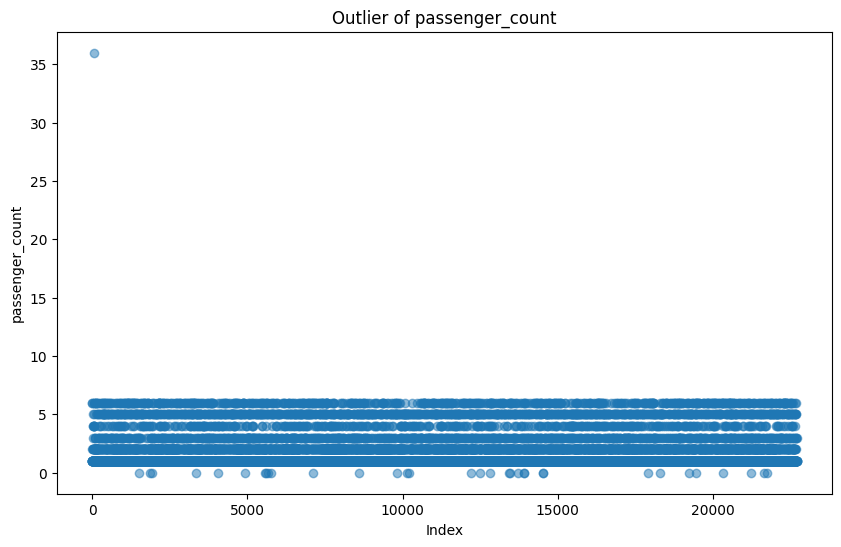

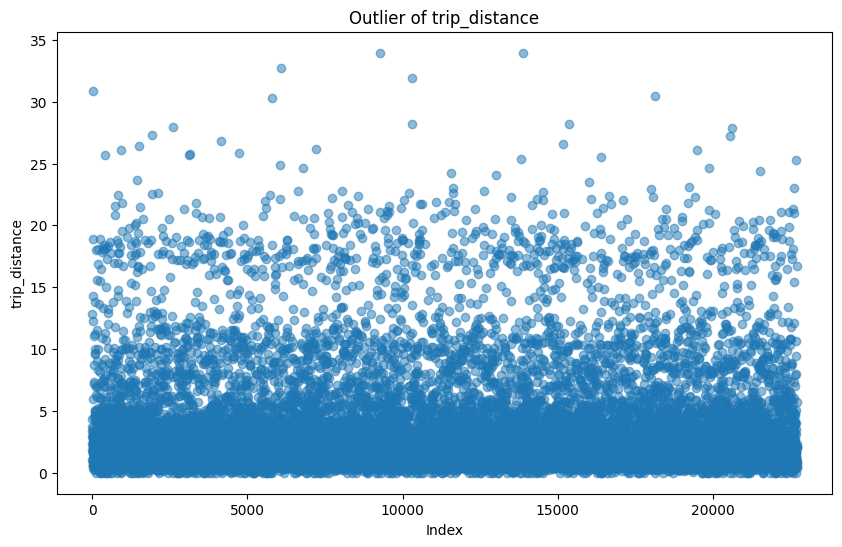

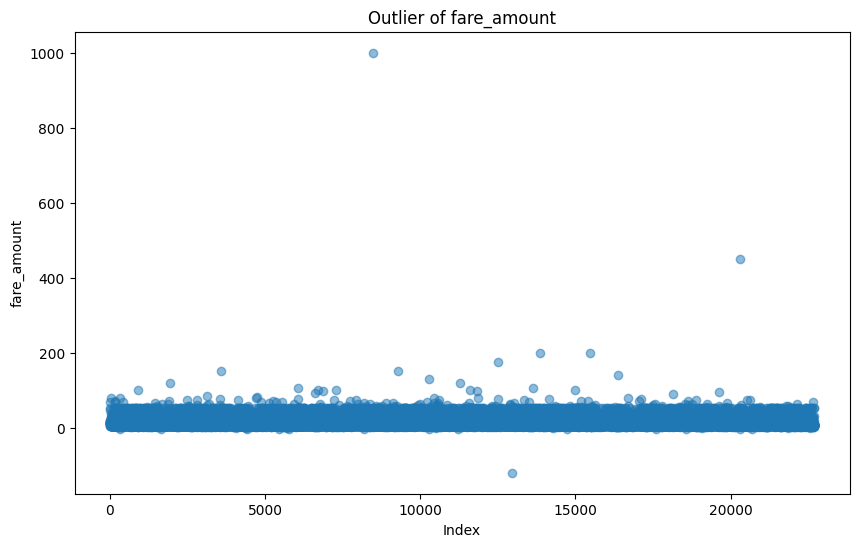

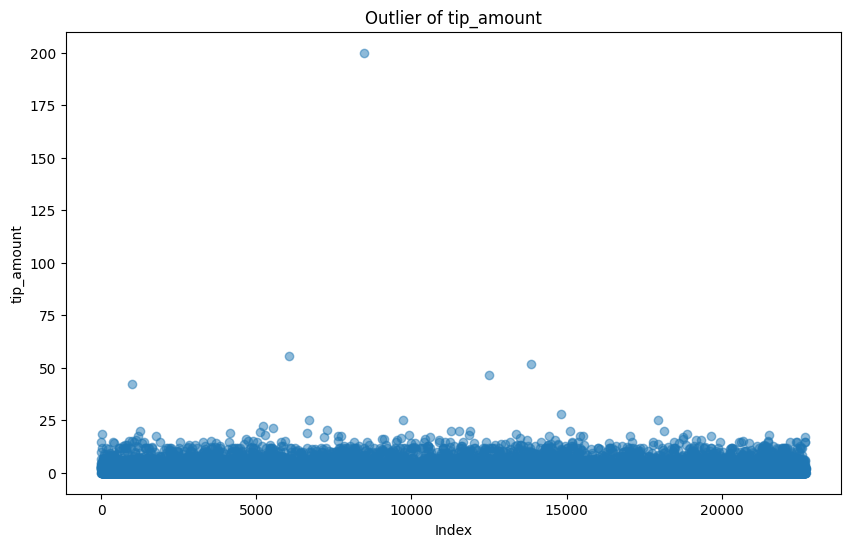

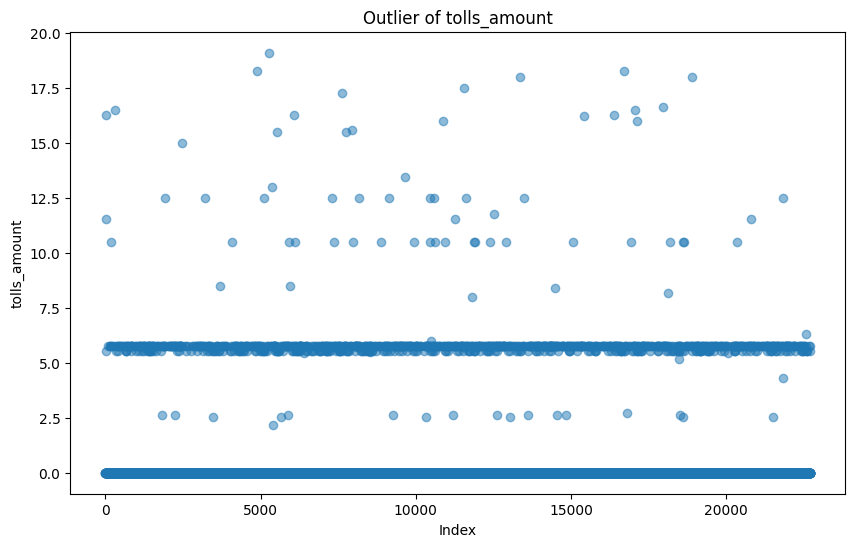

In [37]:
import matplotlib.pyplot as plt

numeric_columns = trip_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(trip_df.index, trip_df[column], alpha=0.5)
    plt.title(f"Outlier of {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.show()

In [38]:
trip_df = trip_df[trip_df['passenger_count'] > 0]
#탑승객이 0일순 없음

In [39]:
trip_df = trip_df[~((trip_df['trip_distance']==0) & (trip_df['fare_amount']>0))]
#거리가 0이거나 금액이 0일순없음

# 5. 데이터 살펴보기

In [40]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,debit card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,debit card,1,1.80,16.0,4.00,0.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,debit card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,debit card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,debit card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,debit card,1,2.36,10.5,1.70,0.00


In [41]:
trip_df['trip_duration'] = (trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime'])

In [42]:
trip_corr = trip_df[['trip_distance', 'trip_duration', 'fare_amount']].corr()
trip_corr

,trip_distance,trip_duration,fare_amount
trip_distance,1.000000,0.152520,0.797271
trip_duration,0.152520,1.000000,0.135652
fare_amount,0.797271,0.135652,1.000000


In [43]:
trip_df['payment_method'] = trip_df['payment_method'].replace({'credit card': 'card','debit card': 'card', 'credit': 'card'})